In [2]:
import os
import dask.dataframe as dd
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_cct = pd.read_parquet("/home/onyxia/work/df_cct_final.parquet")

In [4]:
df_cct

User  Card  Month  Day day_of_week  Hours  Amount  \
0            0     0      9    1      Sunday      6  134.09   
1            0     0      9    1      Sunday      6   38.48   
2            0     0      9    2      Monday      6  120.34   
3            0     0      9    2      Monday     17  128.95   
4            0     0      9    3     Tuesday      6  104.71   
...        ...   ...    ...  ...         ...    ...     ...   
24386895  1999     1      2   27    Thursday     22  -54.00   
24386896  1999     1      2   27    Thursday     22   54.00   
24386897  1999     1      2   28      Friday      7   59.15   
24386898  1999     1      2   28      Friday     20   43.12   
24386899  1999     1      2   28      Friday     23   45.13   

                   Use Chip        Merchant Name  Merchant City  ... Retired  \
0         Swipe Transaction  3527213246127876953       La Verne  ...       0   
1         Swipe Transaction  -727612092139916043  Monterey Park  ...       0   
2         Swipe Transaction  -727612092139916043  Monterey Park  ...       0   
3         Swipe Transaction  3414527459579106770  Monterey Park  ...       0   
4         Swipe Transaction  5817218446178736267       La Verne  ...       0   
...                     ...                  ...            ...  ...     ...   
24386895   Chip Transaction -5162038175624867091      Merrimack  ...       0   
24386896   Chip Transaction -5162038175624867091      Merrimack  ...       0   
24386897   Chip Transaction  2500998799892805156      Merrimack  ...       0   
24386898   Chip Transaction  2500998799892805156      Merrimack  ...       0   
24386899   Chip Transaction  4751695835751691036      Merrimack  ...       0   

          daily_amount  nb_daily_declines_card  bad_pin  insufficient_balance  \
0               134.09                     0.0        0                     0   
1               172.57                     0.0        0                     0   
2               120.34                     0.0        0                     0   
3               249.29                     0.0        0                     0   
4               104.71                     0.0        0                     0   
...                ...                     ...      ...                   ...   
24386895        369.71                     0.0        0                     0   
24386896        423.71                     0.0        0                     0   
24386897         59.15                     0.0        0                     0   
24386898        102.27                     0.0        0                     0   
24386899        147.40                     0.0        0                     0   

          hr_nbt/last_30d_av_hr_nbt  last_18h_nbt  last_18h_amt  \
0                          1.000000           1.0        134.09   
1                          1.333333           2.0        172.57   
2                          0.750000           1.0        120.34   
3                          0.800000           2.0        249.29   
4                          0.833333           2.0        233.66   
...                             ...           ...           ...   
24386895                   1.610738           7.0        369.71   
24386896                   2.388158           8.0        423.71   
24386897                   0.796053           6.0        302.77   
24386898                   0.794702           2.0        102.27   
24386899                   0.796053           3.0        147.40   

          last_3d_amt/nbt  Is Fraud?  
0              134.090000          0  
1               86.285000          0  
2               97.636667          0  
3              105.465000          0  
4              105.314000          0  
...                   ...        ...  
24386895        62.315294          0  
24386896        61.853333          0  
24386897        52.769286          0  
24386898        52.126000          0  
24386899        51.688750          0  

[24386900 rows x 25 columns]

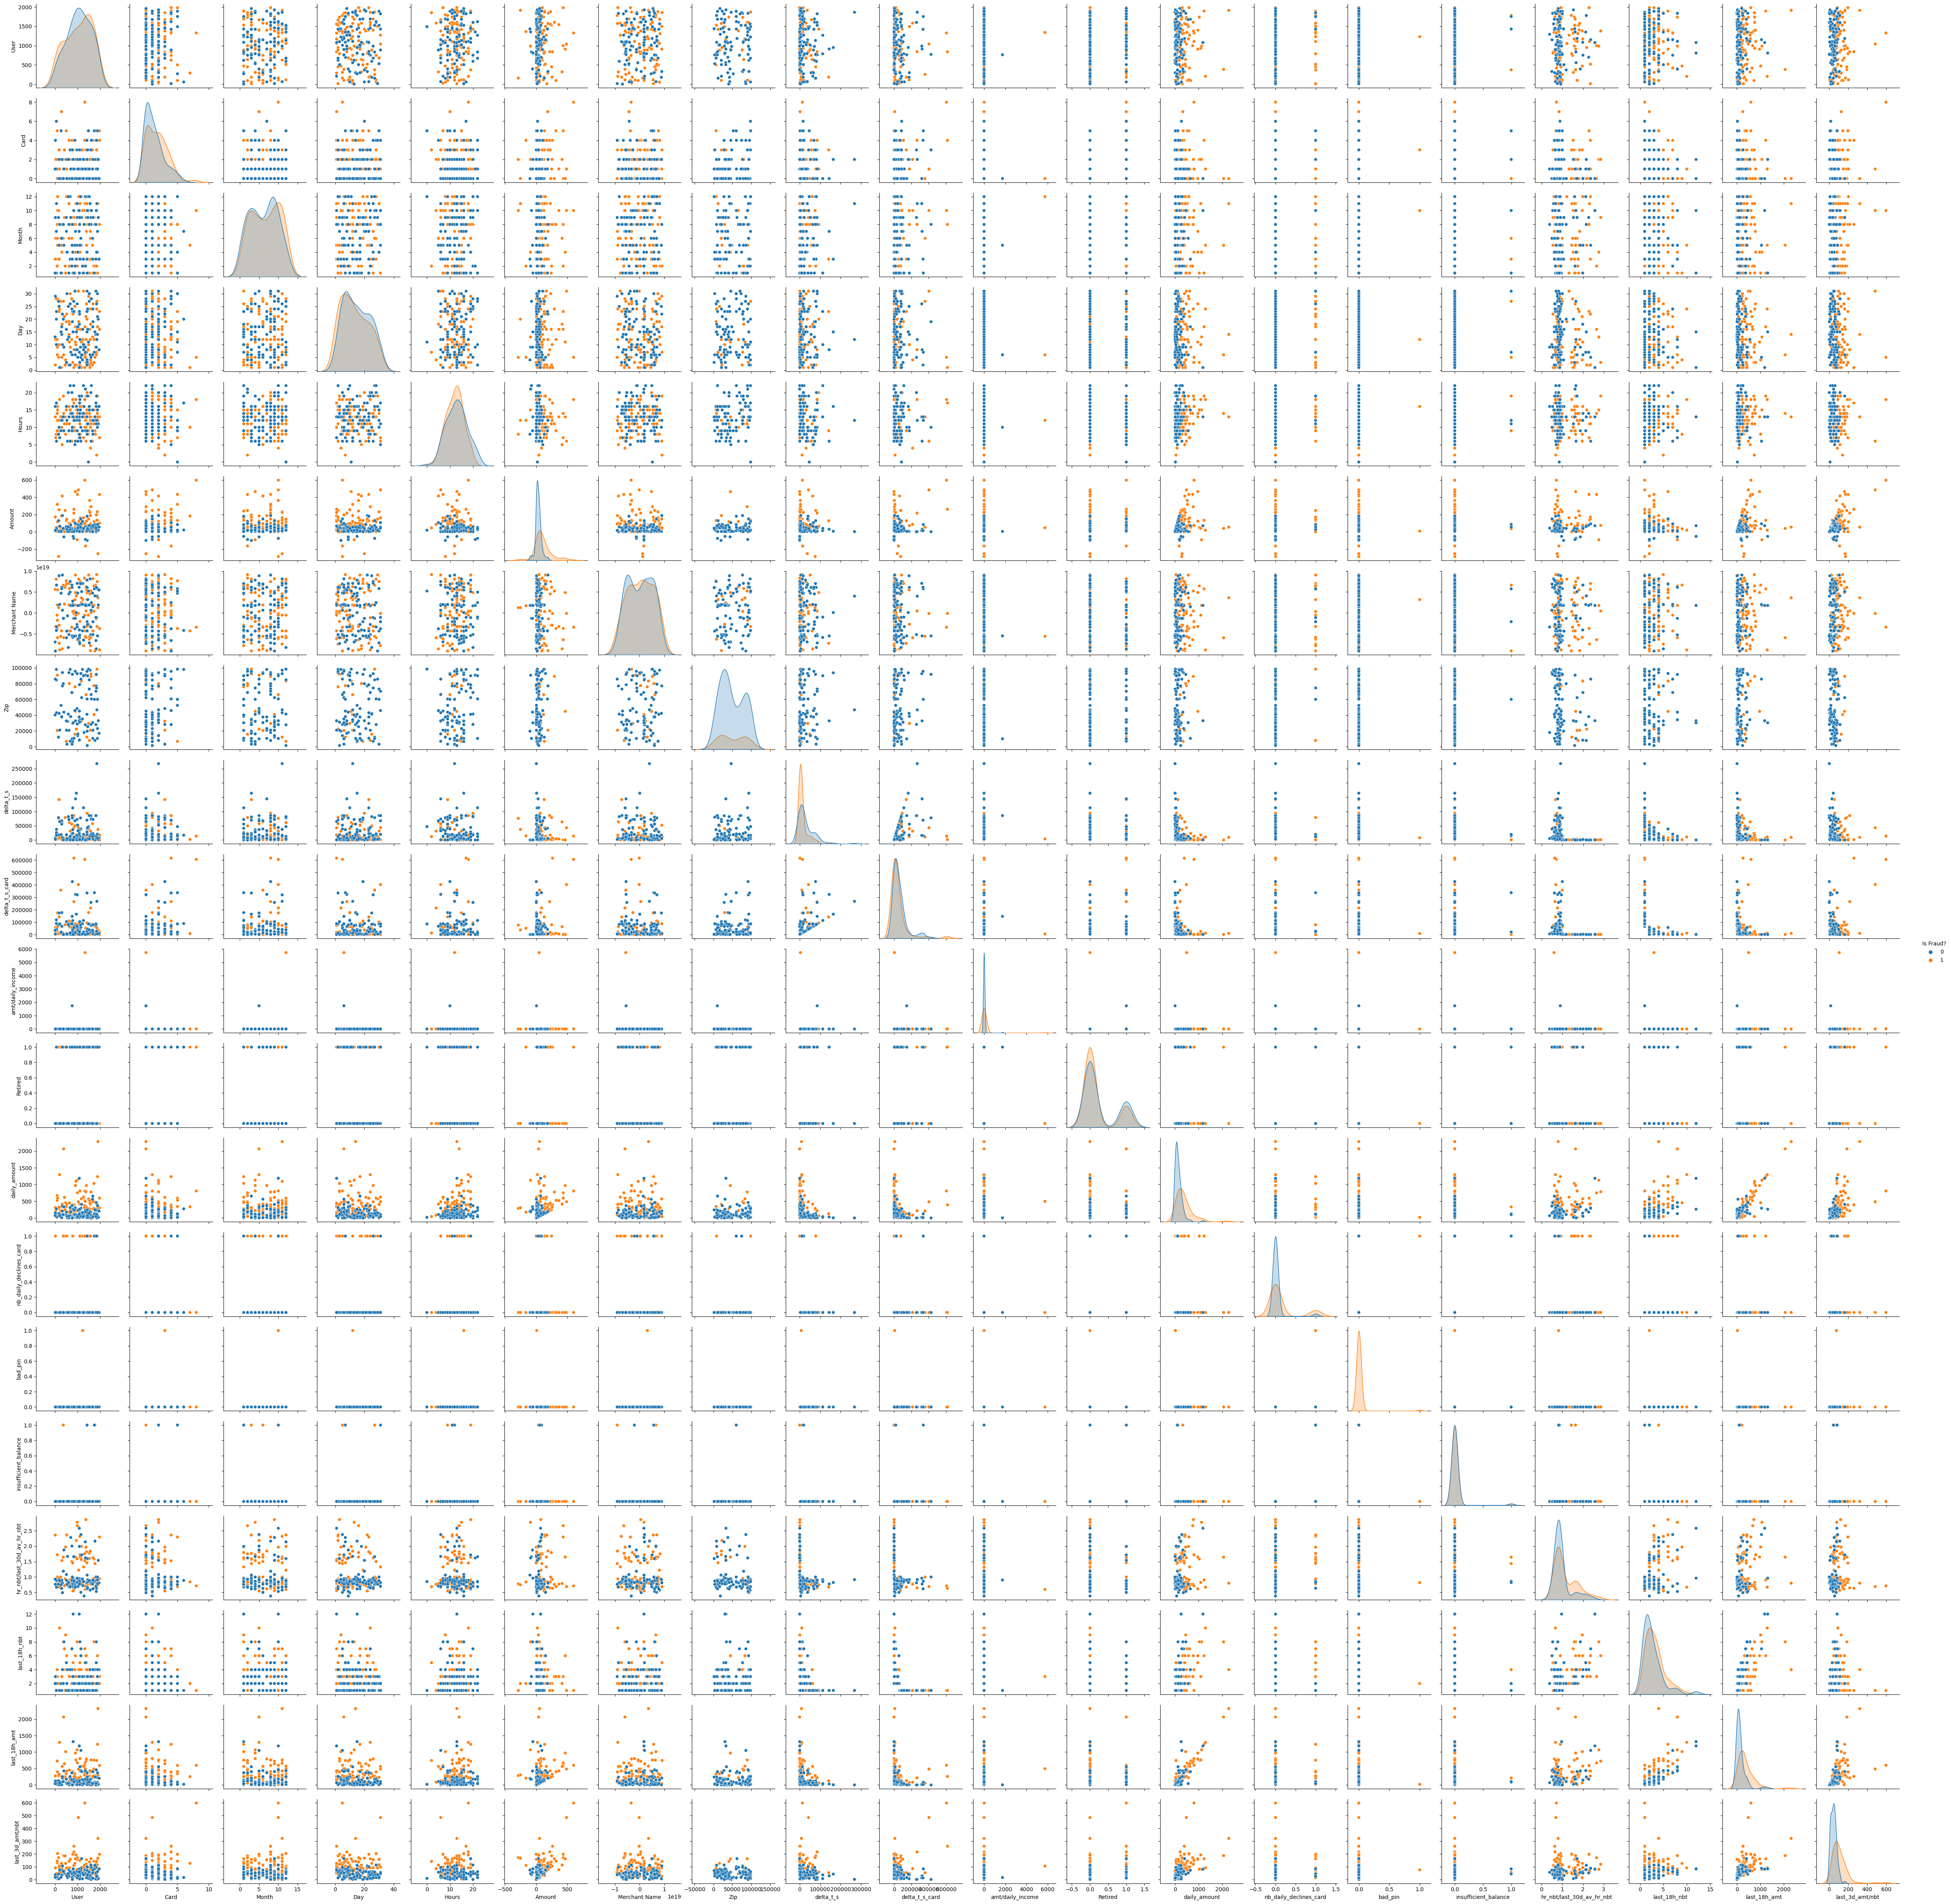

In [5]:
df_cct_fraud = df_cct[df_cct['Is Fraud?']==1].sample(100)
df_cct_no_fraud = df_cct[df_cct['Is Fraud?']==0].sample(100)
df_cct_sample = pd.concat([df_cct_fraud,df_cct_no_fraud])

sns.pairplot(df_cct_sample,hue="Is Fraud?")

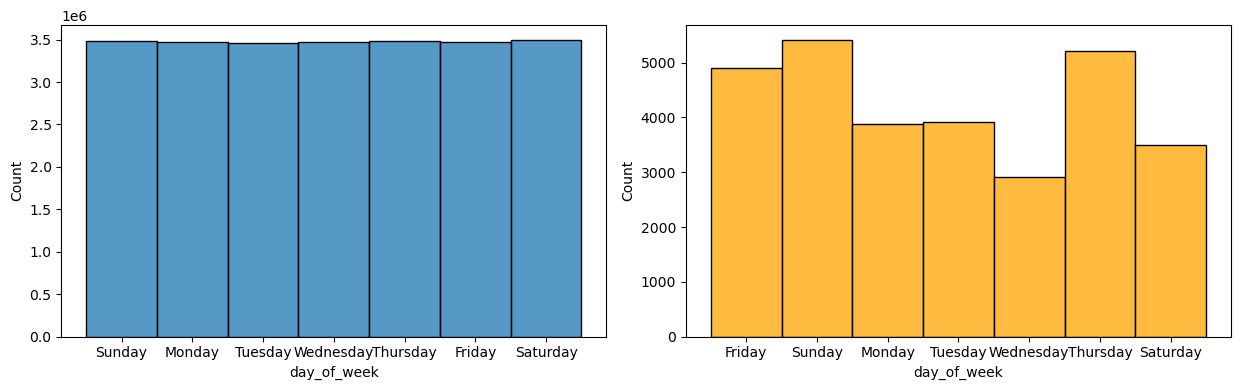

In [21]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='day_of_week',data=df_cct[df_cct["Is Fraud?"] == 0], bins=10)

plt.subplot(1,4,2) 
sns.histplot(x='day_of_week',data=df_cct[df_cct["Is Fraud?"] == 1], bins=10, color = 'orange')

plt.tight_layout()
plt.show()
